In [174]:
# Metapackage of all tidyverse packages
library(tidyverse)
# Library for manipulating scales
library(scales)

In [175]:
# Gathering the data
price_data <- read.csv("/kaggle/input/sc-ship-price-data/sc_ship_prices_322_vs_323.csv")

In [176]:
# Taking a look at the data 
head(price_data)

# Checking all the colnames
colnames(price_data)

,location,ship,price_322,price_323
,<chr>,<chr>,<int>,<int>
1,Lorville,Hoverquad,88000,56700
2,Lorville,Mule,15000,68040
3,Lorville,Greycat ROC,172000,103950
4,Lorville,X1,10584,10584
5,Lorville,X1 Velocity,11007,11007
6,Lorville,Tumbril Cyclone,28086,110170


[1] "location"  "ship"      "price_322" "price_323"

We can get a glimpse of the content in the table above.

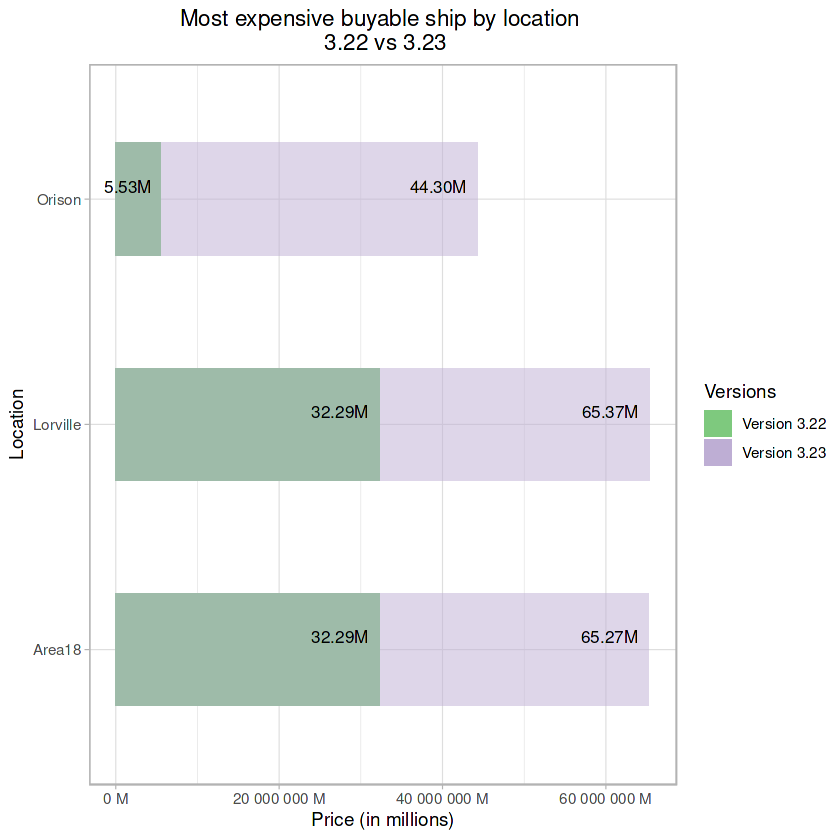

In [185]:
#Obtaining the highest ship price from version 3.22 
df_max_price_322 <- price_data %>%
group_by(location) %>%
summarize(price_data = max(price_322, na.rm = TRUE))

#Obtaining the highest ship price from version 3.23

df_max_price_323 <- price_data %>%
group_by(location) %>%
summarize(price_data = max(price_323, na.rm = TRUE))

# Finding the most expensive and cheapest ships across both versions to scale the graph.
max_price <- max(price_data$price_322, price_data$price_323)
min_price <- min(price_data$price_322, price_data$price_323)

per_location_price_increase <- ggplot(mapping = aes(x = location)) +
  geom_bar(data = df_max_price_322, aes(y = price_data, fill = "price_322"), width = 0.5, stat = 'identity') +
  geom_bar(data = df_max_price_323, aes(y = price_data, fill = "price_323"), width = 0.5, stat = 'identity', alpha = 0.5) +
  geom_text(data = df_max_price_323, aes(y = price_data, label = sprintf("%.2fM", price_data / 1000000)), vjust = -0.5, hjust = 1.2, size = 3.5, color = "black") +
  geom_text(data = df_max_price_322, aes(y = price_data, label = sprintf("%.2fM", price_data / 1000000)), vjust = -0.5, hjust = 1.2, size = 3.5, color = "black") +
  labs(title = "Most expensive buyable ship by location \n 3.22 vs 3.23",
       x = "Location",
       y = "Price (in millions)",
      fill = "Versions") +
scale_fill_brewer(type = "qual", labels = c("price_322" = "Version 3.22", "price_323" = "Version 3.23")) +
  theme_light() +
  scale_y_continuous(labels = unit_format(unit = "M")) +
  theme(plot.title = element_text(hjust = 0.5)) +
coord_flip()

# Displaying the graph
print(per_location_price_increase)

In [187]:
# Finding the ship which had the biggest price increase from 3.22 to 3.23 

# Calculate price change
ship_price_delta <- price_data %>%
  arrange(ship) %>%
  mutate(price_increase = price_323 - price_322)

max_price_delta <- ship_price_delta %>%
  slice(which.max(price_increase))  # Retrieve the row with the maximum price increase

# Selecting the top 5 vehicles to avoid graph clutter

top_5 <- ship_price_delta %>%
  arrange(desc(price_increase)) %>%
    head(5)

# Calculating the percentage of the price increase on the top 5 vehicles

top_5_percent <- top_5 %>%
  mutate(percentage_increase = ((price_323 - top_5$price_322) / top_5$price_322 * 100) / 100)  %>%
arrange(desc(percentage_increase))

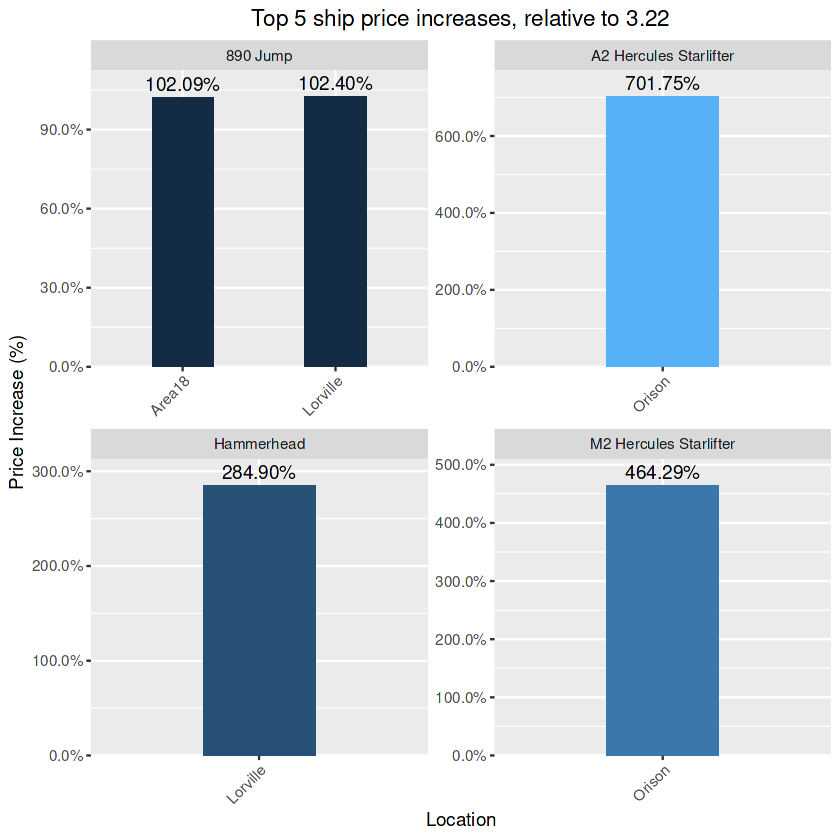

In [188]:
# Finding the max percentage increase
max_percent_delta <- max(top_5_percent$percentage_increase)


# Plotting the graph
top_5_plot <- ggplot(top_5_percent, aes(x = location, y = percentage_increase, fill = percentage_increase)) +
  geom_bar(stat = "identity", width = 0.4) +
geom_text(aes(label = sprintf("%.2f%%", percentage_increase * 100)), vjust = -0.5) + # Add labels at the top of each bar
  labs(title = "Top 5 ship price increases, relative to 3.22",
       x = "Location",
       y = "Price Increase (%)") +
  theme(plot.title = element_text(hjust = 0.5)) +
scale_y_continuous(labels = scales::percent_format(accuracy = 0.1),
                  expand = expansion(mult = c(0, 0.1))) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) + 
facet_wrap(~ship, scales = "free") +  # Facet by dealer to show each instance separately
 guides(fill = "none")  # Remove the legend for fill (price_increase)

# Displaying the graph
print(top_5_plot)